A continuación se presentan los pasos para un análisis exploratorio y de limpieza de Datos

In [14]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
df_cour_co = pd.read_csv("./Moocs/Coursera_courses.csv")

1. Observación de las caracteristicas del Data frame (cálculo de nulos y eliminación de duplicados)

In [15]:
# No se evidencian presencia de valores nulos o duplicados
df_cour_co.info()
df_cour_co.head()
print(df_cour_co.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB
0


2. Manipulación de las columas que poseen texto para su procesamiento y generación de wordcloud

In [16]:
#Poner todo en minuscula
columns= df_cour_co.select_dtypes(include="object")

for i in columns:
    df_cour_co[i] = df_cour_co[i].str.lower()

df_cour_co.head(50)

# Sustitución de caracteres especiales
def clean_values(series, to_replace, value, regex = True):
    for i in to_replace:
        series = series.str.replace(i, value, regex=regex)
    return series

pattern = [';',',','.',':','!','&','#','#','$','"',"'","-"]

df_cour_co['course_id'] = clean_values(df_cour_co['course_id'],pattern,value=' ',regex = True)
#Se aplica el metodo strip para borrar espacios en blanco
df_cour_co['course_id']=df_cour_co['course_id'].str.strip()
#Eliminar espacios en blanco
df_cour_co['course_id'] = df_cour_co['course_id'].str.replace(r'\s+',' ',regex=True)

3. Generación del Wordcloud para el campo course_id

There are 14810 words in the combination of all review.


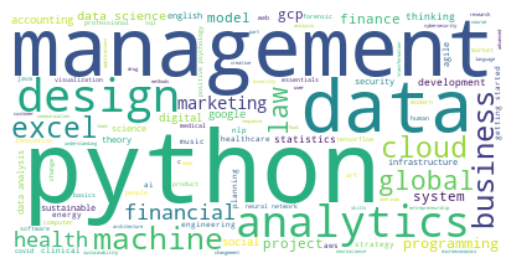

In [17]:
text = " ".join(course_id for course_id in df_cour_co.course_id)
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(["basic", "learn", "fundamental", "international", "wharton","fundamentals","introduction","intro","uva darden","uva","darden","principles","foundation","foundations","learning","big","everyday","tools"])

# Generar una imagen de nube de palabras
wordcloud = WordCloud(stopwords=stopwords,max_font_size=80, max_words=100,background_color="white").generate(text)

# Visualizar la imagen generada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

4. Se Eliminan las columnas que no aportan información útil para análisis posterior

In [18]:
df_cour_co.drop(columns=["course_url","name"],inplace=True)

5. Se genera un archivo csv a partir del Dataframe para su uso posterior en powerbi

In [19]:
df_cour_co.to_csv("coursera_courses.csv")